# US Counties

Data ini berisi data "kasus" pada negara bagian di Amerika. Tidak diketahui persis kasus apa yang dimaksud, namun dengan adanya data "death" didalamnya, dan data menunjukan tahun 2020, dimana pada waktu tersebut, kasus COVID-19 sedang memanas. Sehingga, dugaan sementara pada data ini, menunjukan data jumlah kasus terjangkit dan kematian akibat COVID-19 di Amerika, berdasarkan wilayah negara bagian.

In [138]:
import pandas
import matplotlib.pyplot as plt

# Pre-Eliminaries

Dengan adanya data baru yang tidak selesai pada baris paling terakhir, maka baris tersebut harus dihapus secara manual sebelum diload pandas. Apabila tidak melakukan tahapan ini, data tidak bisa dibuka.

In [139]:
dataframe = pandas.read_csv("data/us-counties.csv")

# Data exploration
dataframe.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


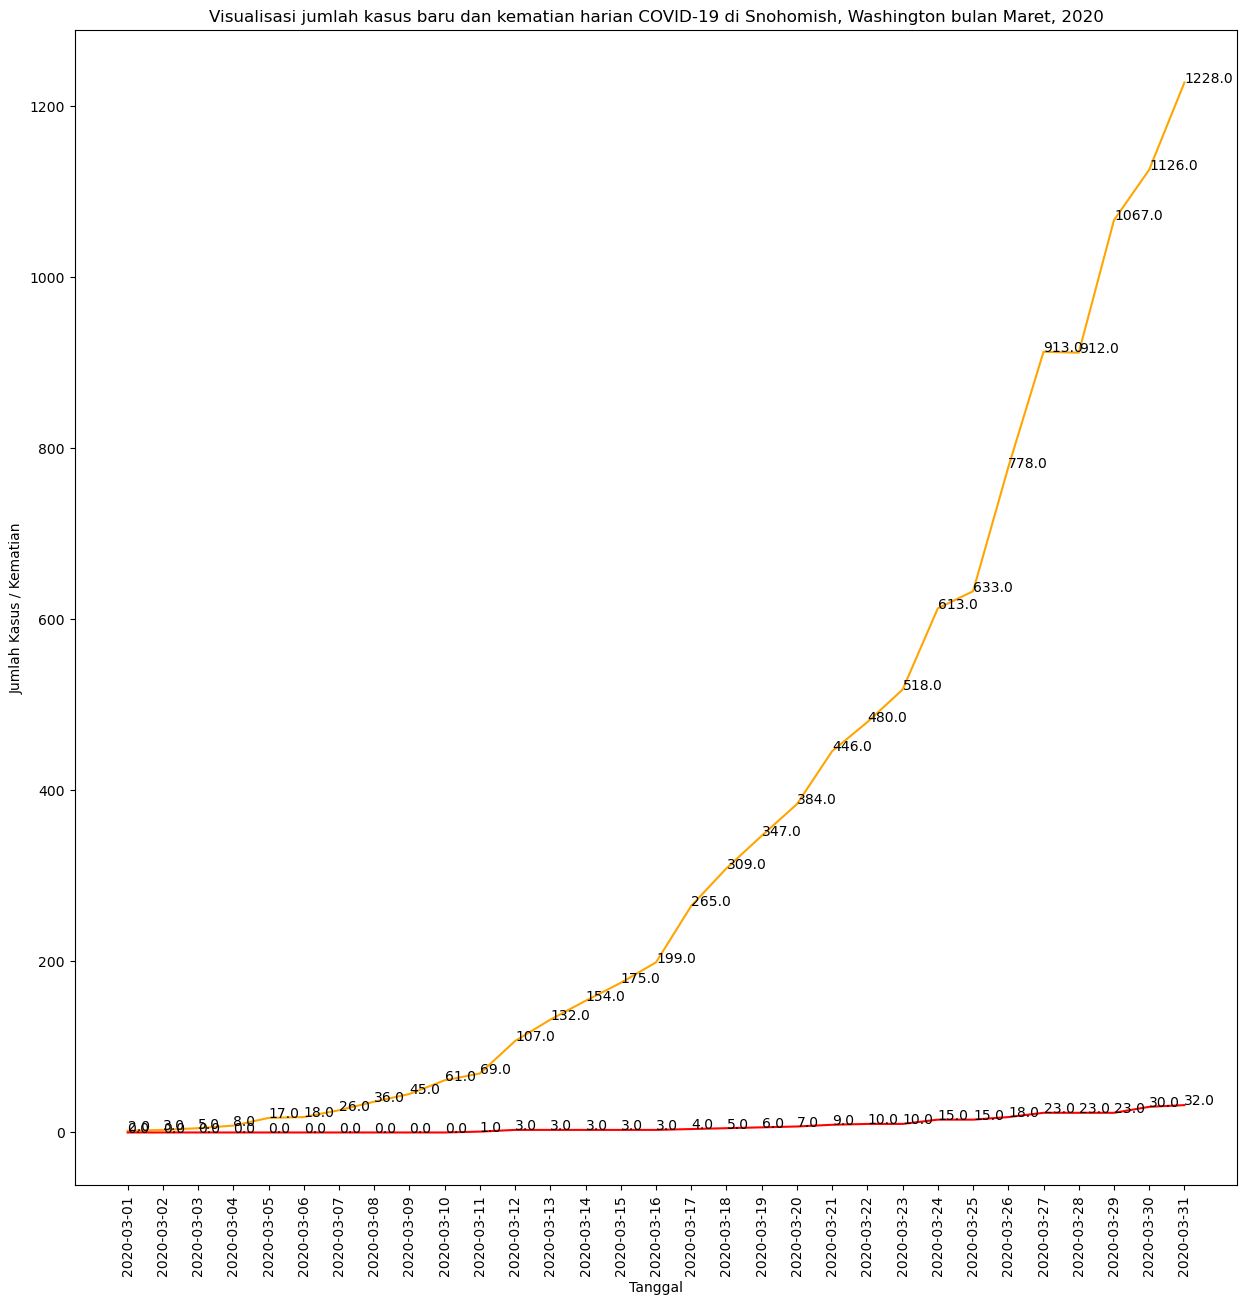

In [140]:
# Visualisasi jumlah kasus baru dan kematian harian COVID-19 di Snohomish, Washington

dataframe_snohomish_washington = dataframe.where((dataframe["fips"] == 53061) & (dataframe["date"] > "2020-02-29") & (dataframe["date"] < "2020-04-01"))
dataframe_snohomish_washington = dataframe_snohomish_washington.dropna()

x = dataframe_snohomish_washington["date"]
y_cases = dataframe_snohomish_washington["cases"]
y_deaths = dataframe_snohomish_washington["deaths"]

plt.figure(figsize=(15, 15))

plt.plot(x, y_cases, color = "orange", label = "New Case(s)")
plt.plot(x, y_deaths, color = "red", label = "New Death(s)")
plt.title("Visualisasi jumlah kasus baru dan kematian harian COVID-19 di Snohomish, Washington bulan Maret, 2020")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus / Kematian")
plt.xticks(x, rotation = "vertical")

for i, j in zip(x, y_cases):
    plt.text(i, j, str(j))

for i, j in zip(x, y_deaths):
    plt.text(i, j, str(j))

plt.show()

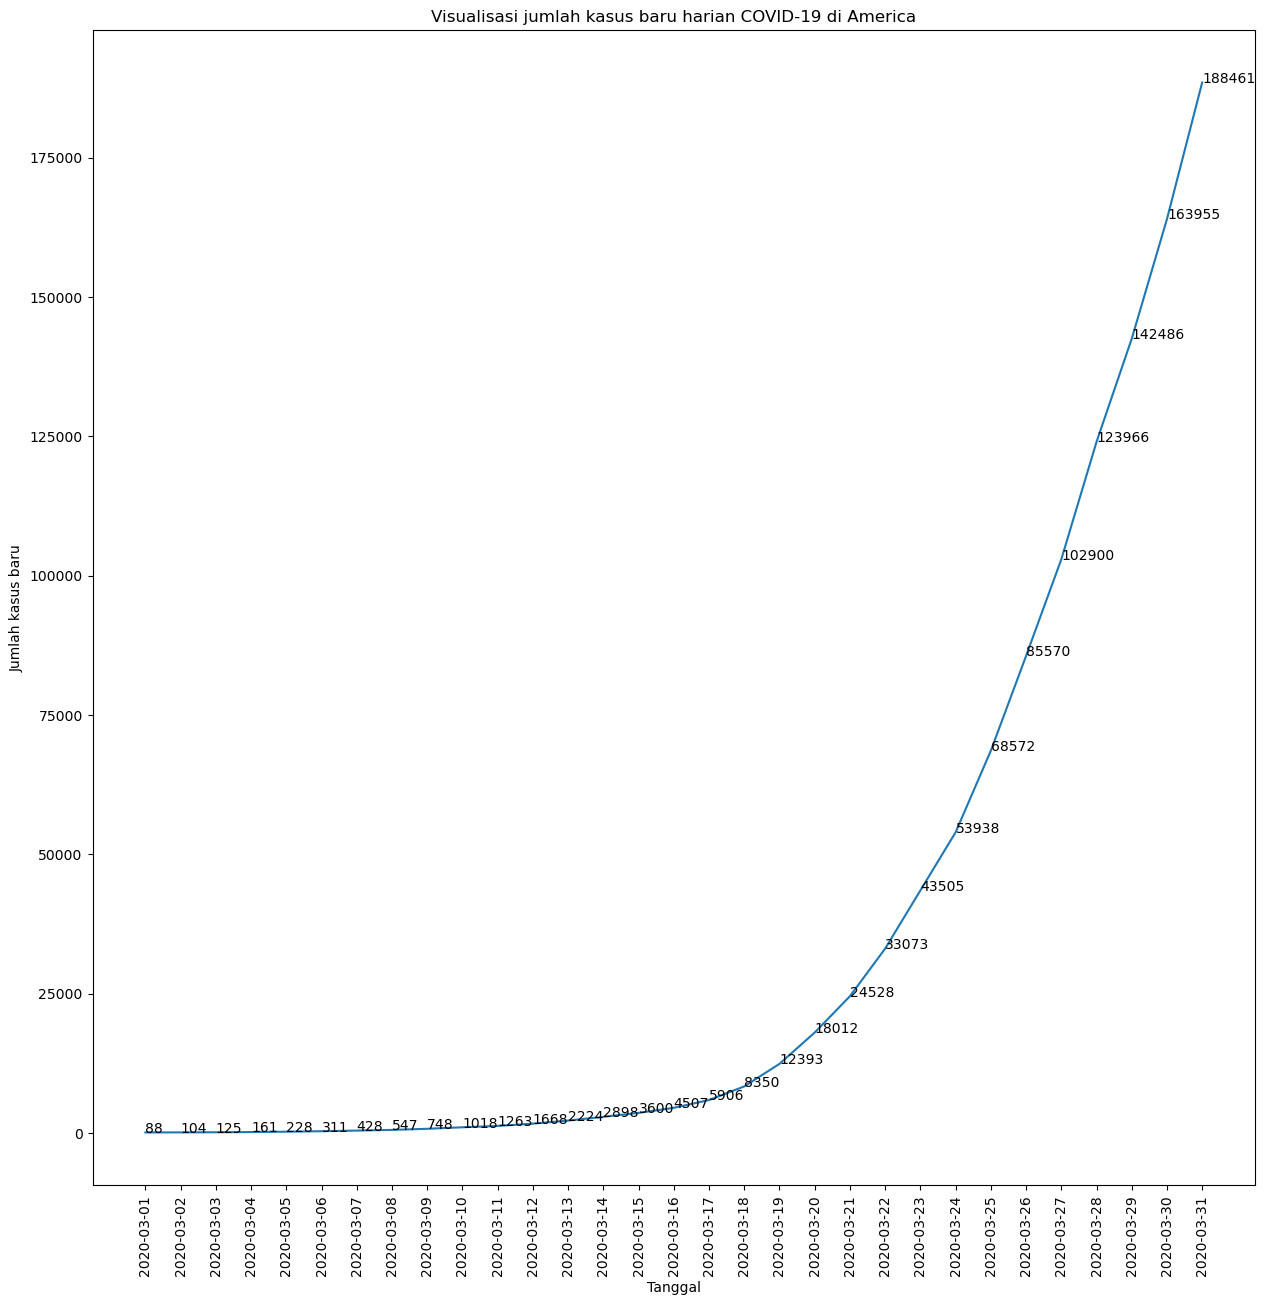

In [141]:
# Visualisasi jumlah kasus baru harian COVID-19 di America 

dataframe_march = dataframe.where((dataframe["date"] > "2020-02-29") & (dataframe["date"] < "2020-04-01"))
dataframe_march = dataframe_march.dropna()

x = dataframe_march["date"].unique()
y = []

for i in x:
    y.append(dataframe.loc[dataframe["date"] == i, "cases"].sum())

plt.figure(figsize=(15, 15))
plt.plot(x, y)
plt.title("Visualisasi jumlah kasus baru harian COVID-19 di America")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah kasus baru")
plt.xticks(x, rotation = "vertical")

for i, j in zip(x, y):
    plt.text(i, j, str(j))

plt.show()

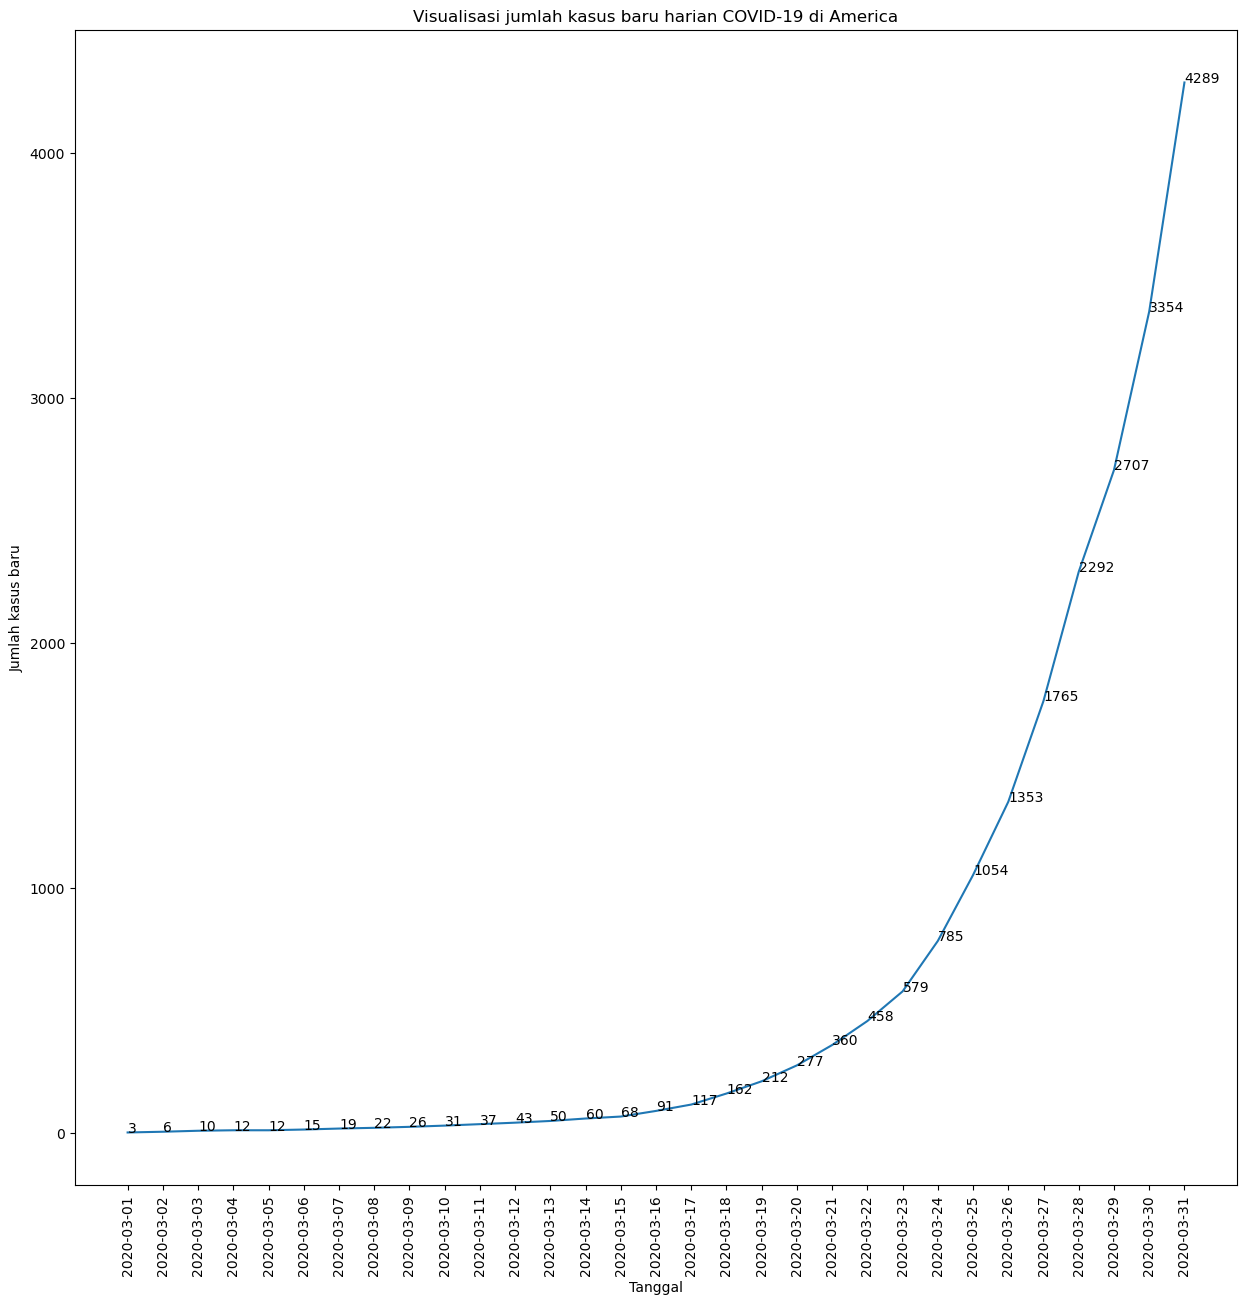

In [142]:
# Visualisasi jumlah kasus baru harian COVID-19 di America 

dataframe_march = dataframe.where((dataframe["date"] > "2020-02-29") & (dataframe["date"] < "2020-04-01"))
dataframe_march = dataframe_march.dropna()

x = dataframe_march["date"].unique()
y = []

for i in x:
    y.append(dataframe.loc[dataframe["date"] == i, "deaths"].sum())

plt.figure(figsize=(15, 15))
plt.plot(x, y)
plt.title("Visualisasi jumlah kasus baru harian COVID-19 di America")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah kasus baru")
plt.xticks(x, rotation = "vertical")

for i, j in zip(x, y):
    plt.text(i, j, str(j))

plt.show()

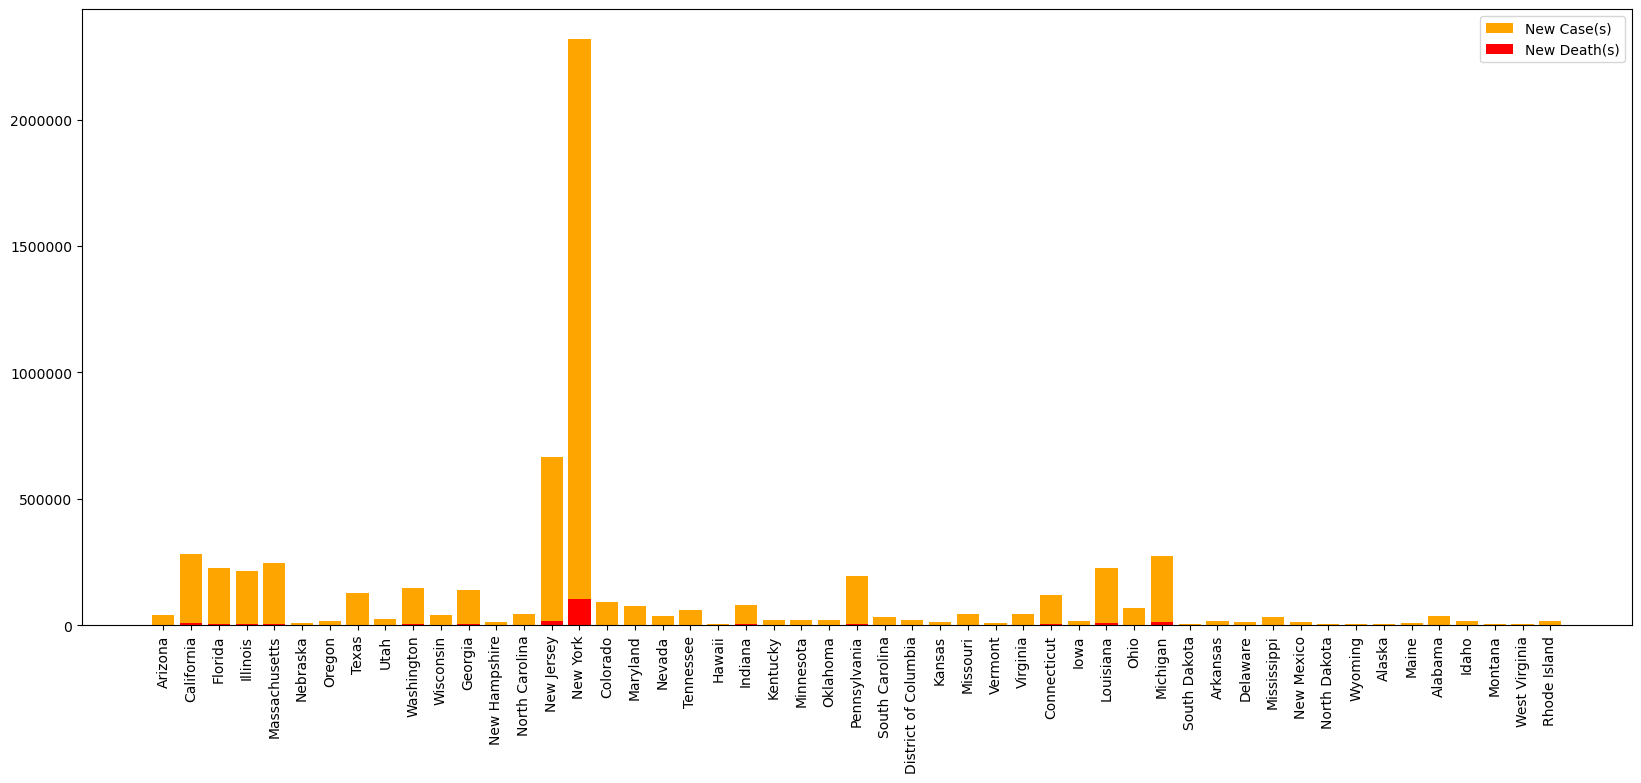

In [143]:
# Visualisasi jumlah kasus baru dan kematian akibat COVID-19 di America per negara bagian (state) 

dataframe_march = dataframe.where((dataframe["date"] > "2020-02-29") & (dataframe["date"] < "2020-04-01"))
dataframe_march = dataframe_march.dropna()

x = dataframe_march["state"].unique()
y_cases = []
y_deaths = []

for i in x:
    y_cases.append(dataframe.loc[dataframe["state"] == i, "cases"].sum())
    y_deaths.append(dataframe.loc[dataframe["state"] == i, "deaths"].sum())


fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(x, y_cases, color = "orange", label = "New Case(s)")
ax.bar(x, y_deaths, color = "red", label = "New Death(s)")
ax.ticklabel_format(style = "plain", axis = "y", useOffset = False)

plt.xticks(x, rotation = "vertical")

ax.legend()

plt.show()